<a href="https://colab.research.google.com/github/Pronow05/Spotify-Audio-Features-Causal-Analysis/blob/main/Spotify_Audio_Features_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

The dataset used in this project is the Spotify Dataset 1921-2020 available on Kaggle. It contains detailed information on over 600,000 tracks, providing a rich resource for analyzing audio features and their relationship to track popularity.

Dataset Link: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv

### Key Features of the Dataset

**duration_ms**: The duration of the track in milliseconds.

**key**: The overall key of the track, represented as integers based on standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, etc.). A value of -1 indicates no key was detected.

**mode**: Indicates whether the track is in a major (1) or minor (0) scale.

**time_signature**: The estimated time signature (number of beats per bar).

**acousticness**: A confidence measure (0.0 to 1.0) of whether the track is acoustic, where 1.0 indicates high confidence.

**danceability**: A score (0.0 to 1.0) reflecting how suitable a track is for dancing, based on tempo, rhythm, and beat regularity.

**energy**: A perceptual measure of intensity and activity (0.0 to 1.0), with higher values indicating faster, louder, and more dynamic tracks.

**instrumentalness**: Predicts the likelihood of a track containing no vocals. Values closer to 1.0 indicate higher confidence that the track is instrumental.

**liveness**: Measures the presence of a live audience in the recording, with values above 0.8 suggesting a live performance.

**loudness**: The average loudness of a track in decibels (dB), typically ranging from -60 to 0 dB.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**id**: The Spotify ID for the track.

**type**: The object type: “audio_features”

**popularity**: A score (0 to 100) representing the track's popularity, influenced by total and recent plays. Note that the popularity metric may lag real-time data by a few days.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yamaerenay/spotify-dataset-19212020-600k-tracks")

print("Path to dataset files:", path)

100%|██████████| 193M/193M [00:02<00:00, 76.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1/tracks.csv")
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


## Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['year'] = df['release_date'].dt.year
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021.0


In [ ]:
df.isnull().sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,138591
danceability,0
energy,0


In [ ]:
# removing nulls
df = df.dropna()

In [ ]:
df['artists'] = df['artists'].str.replace("'","")
df['artists'] = df['artists'].str.replace("[","")
df['artists'] = df['artists'].str.replace("]","")
df.head()

<ipython-input-8-77eedd63edc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artists'] = df['artists'].str.replace("'","")
<ipython-input-8-77eedd63edc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artists'] = df['artists'].str.replace("[","")
<ipython-input-8-77eedd63edc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922.0
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,-23.228,1,0.1530,0.996,0.9330,0.148,0.612,75.595,3,1922.0


In [ ]:
df.shape

(448010, 21)

# Exploratory Data analysis

### Correlation Analysis

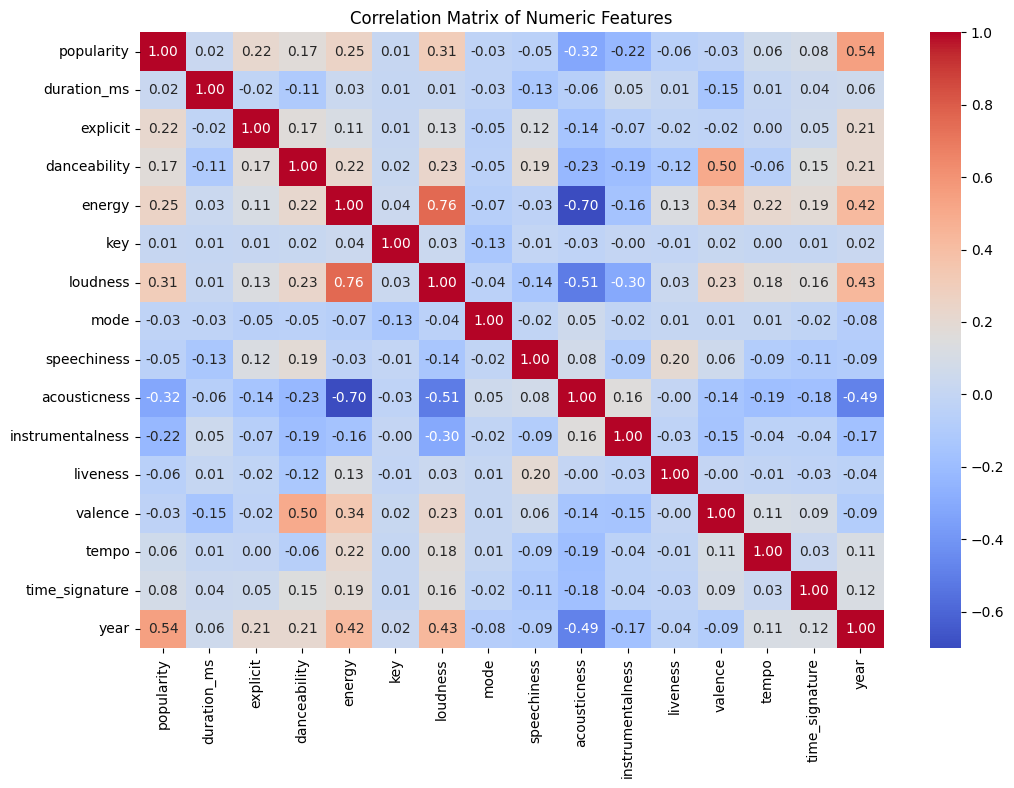

In [ ]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Distribution of Audio Features

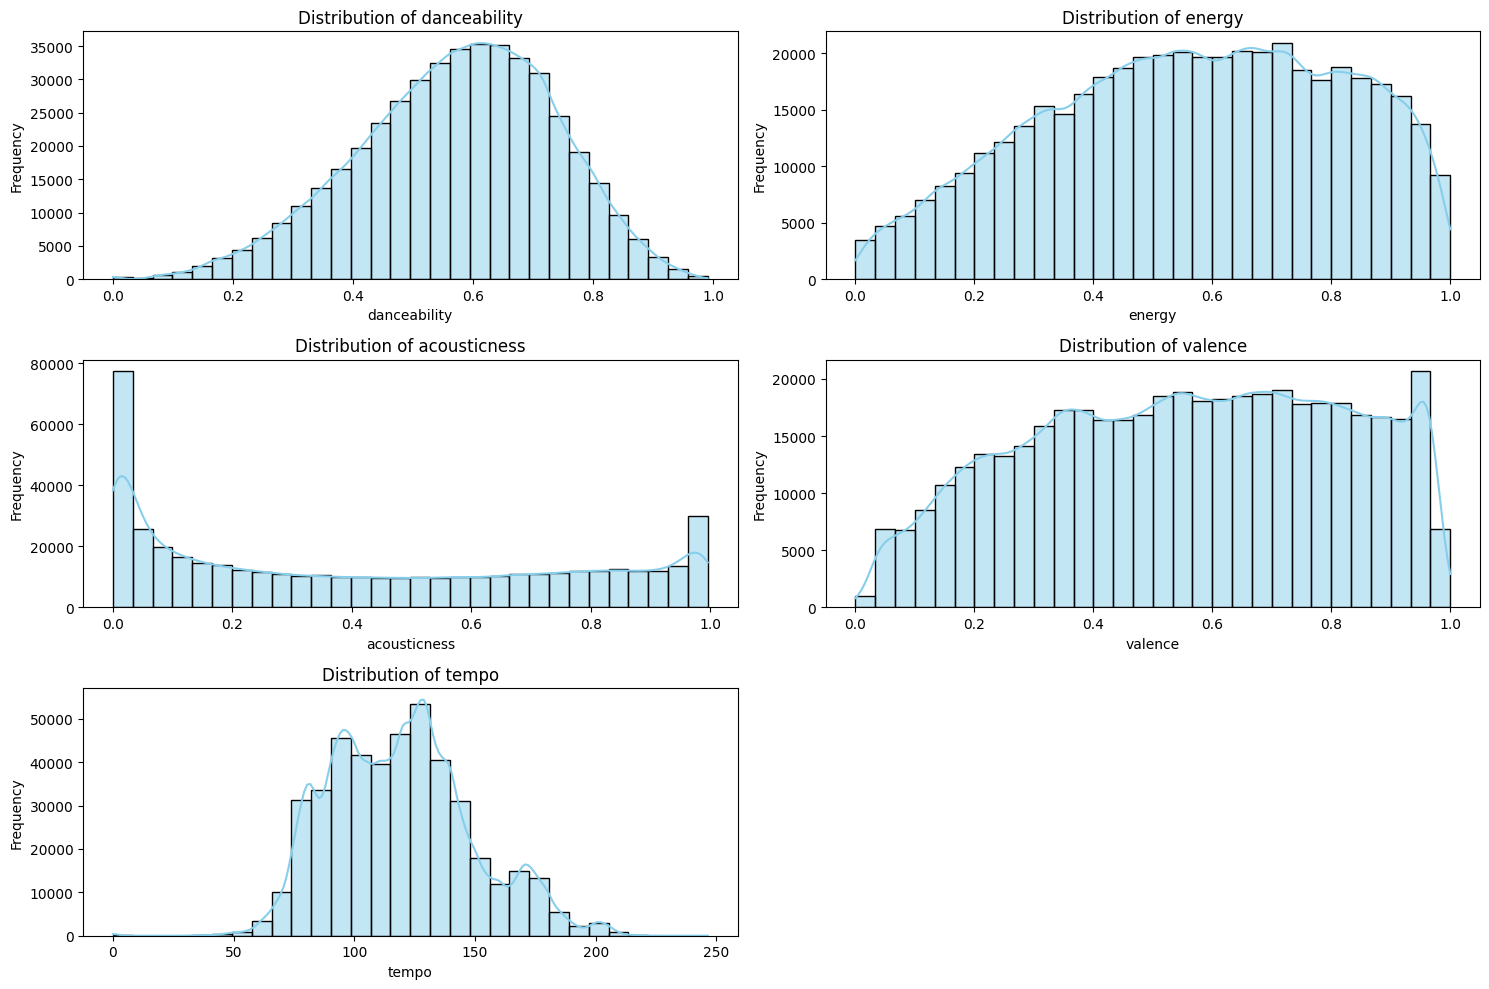

In [ ]:
# Plot distributions of key audio features
features_to_plot = ['danceability', 'energy', 'acousticness', 'valence', 'tempo']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Popularity Distribution Across Key

<ipython-input-13-c190e4d5ecbe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='key', y='popularity', data=popularity_by_key, palette='viridis')


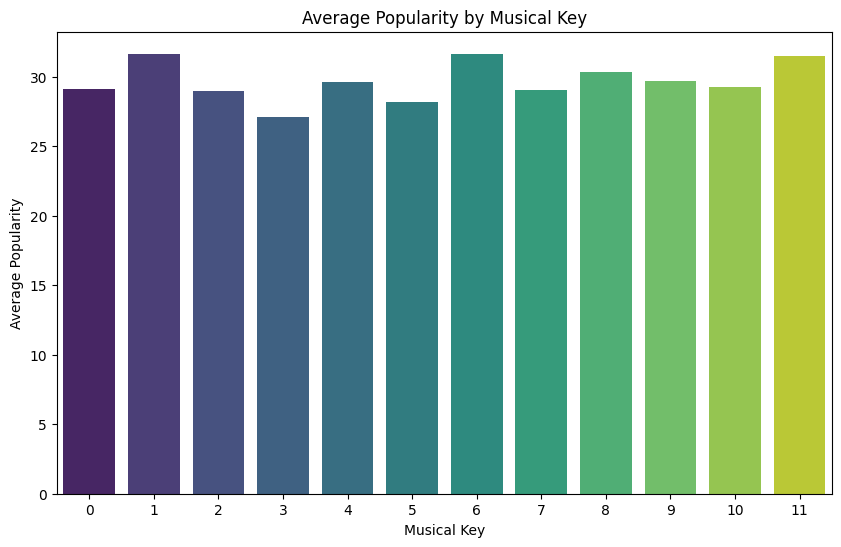

In [ ]:
# Popularity grouped by musical key
popularity_by_key = df.groupby('key')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='popularity', data=popularity_by_key, palette='viridis')
plt.title('Average Popularity by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Average Popularity')
plt.show()

### Music attributes of songs over the years

Text(0.5, 0, 'Year')

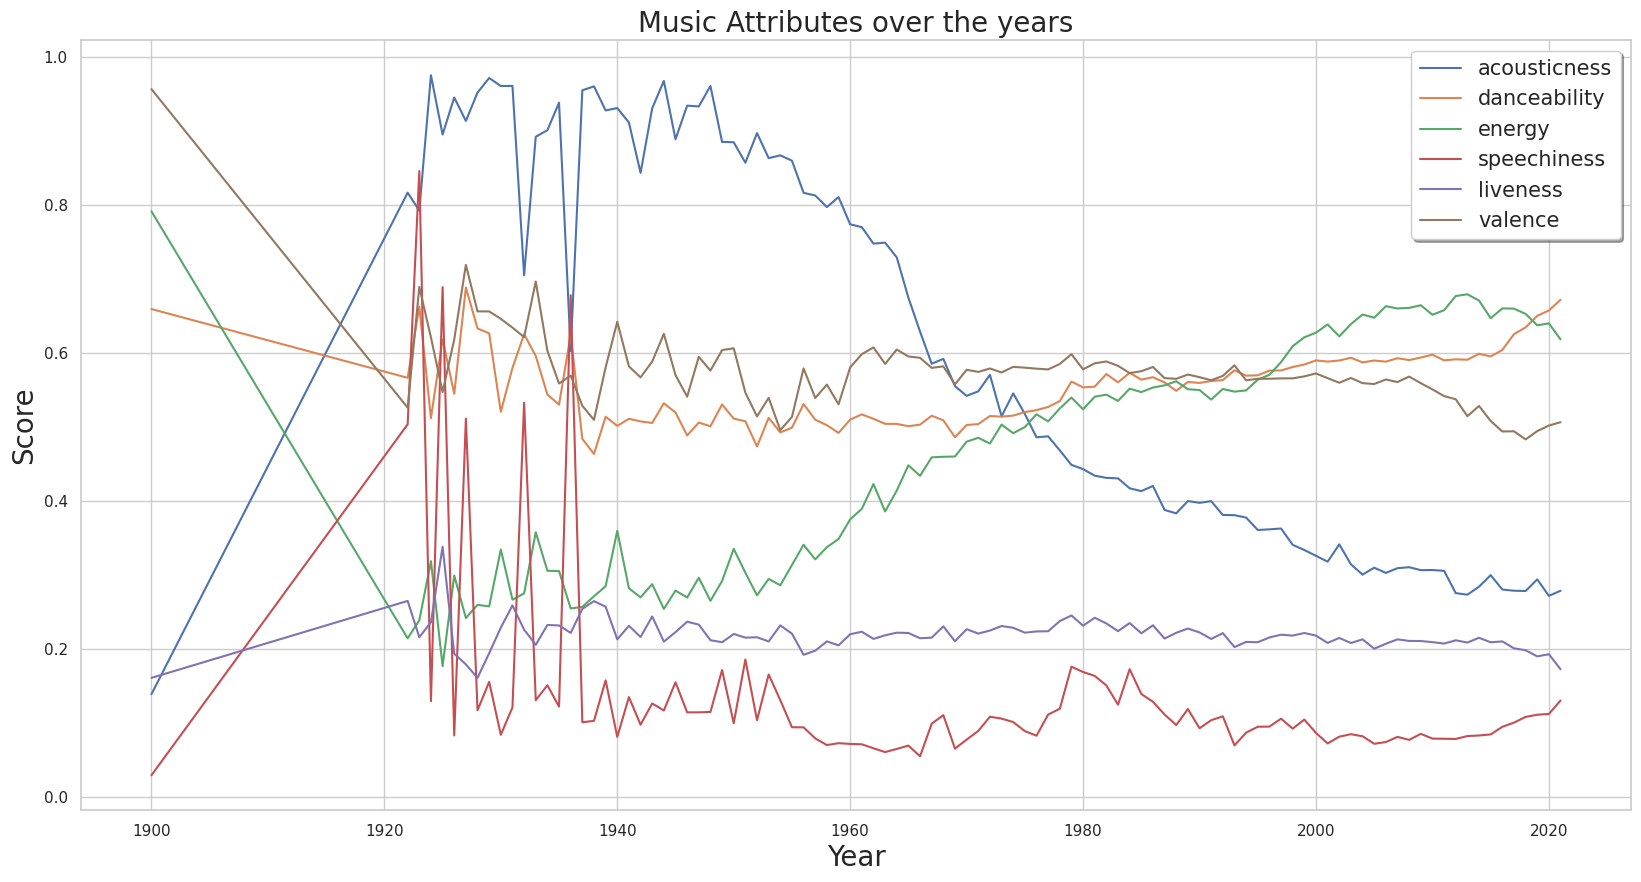

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df.groupby("year")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Music Attributes over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('Score', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

**Acousticness vs. Energy and Danceability**:

Prior to the 1960s, mainstream music was characterized by high acousticness. However, post-1960, there was a noticeable shift as music became more energetic, and danceability increased. This inverse relationship between energy and acousticness likely corresponds to the rise of two influential music genres: hip-hop and EDM. Both genres are known for their energetic, hyped nature, which has led to a decline in acousticness and a rise in energy. Interestingly, danceability did not increase in proportion to energy, indicating that both energetic and acoustic music were perceived as equally danceable.

**Trends in Danceability**:
Over the past decade, the average danceability score has remained relatively constant, suggesting it is not strongly correlated with acousticness or energy, even as these features have shown significant changes.

**Energy and Acousticness Relationship**:
A clear inverse relationship exists between energy and acousticness. As energy levels in music increase, acousticness tends to decrease.


**Speechiness Evolution**:
Speechiness varied considerably before the 1960s but stabilized afterward. Since 1960, the average speechiness score has remained low (< 0.3), suggesting that music with high speech content became less favored in the mainstream market.


**Valence Trends**:
Valence (musical positivity) showed a gradual increase between 1960 and 1980. However, after 2000, there was a significant decline, reflecting a shift towards less positive-sounding music in recent years.

### Loudness

Text(0.5, 0, 'Year')

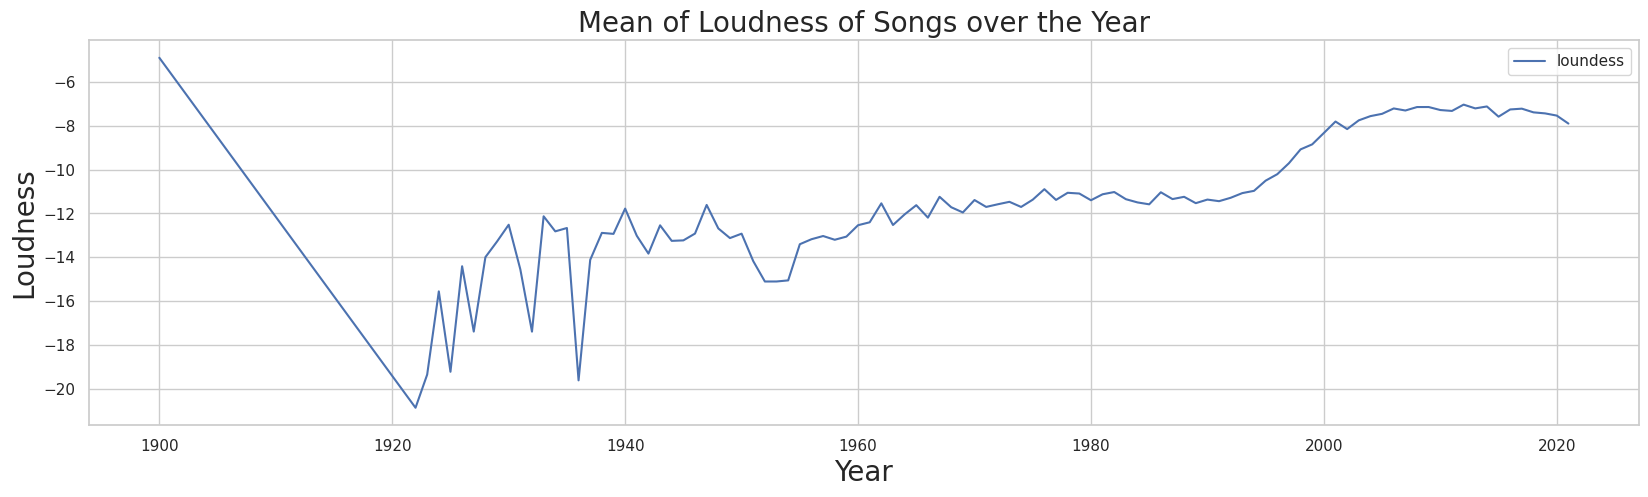

In [ ]:
plt.figure(figsize=(20, 5))
# mean loudness over year
x = df.groupby('year')["loudness"].mean()
ax = sns.lineplot(x= x.index, y=x, label="loundess")

# set axis label and titles
ax.set_title('Mean of Loudness of Songs over the Year', fontsize = 20)
ax.set_ylabel('Loudness', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

**Rising Loudness**:
Since the late 1950s, the mean loudness of music has increased significantly. This reflects a shift in people's music preferences toward louder tracks, particularly with the rise of EDM and hip-hop genres. These styles, especially in the rap industry, are characterized by "loud" sounds and "heavy bass," which have become popular traits in modern music.



**Impact of Technology**:
This trend may also be attributed to advancements in recording technology. Improved techniques and the addition of more audio layers and effects often contribute to increased loudness levels in music production.

### Relationship between year and popularity

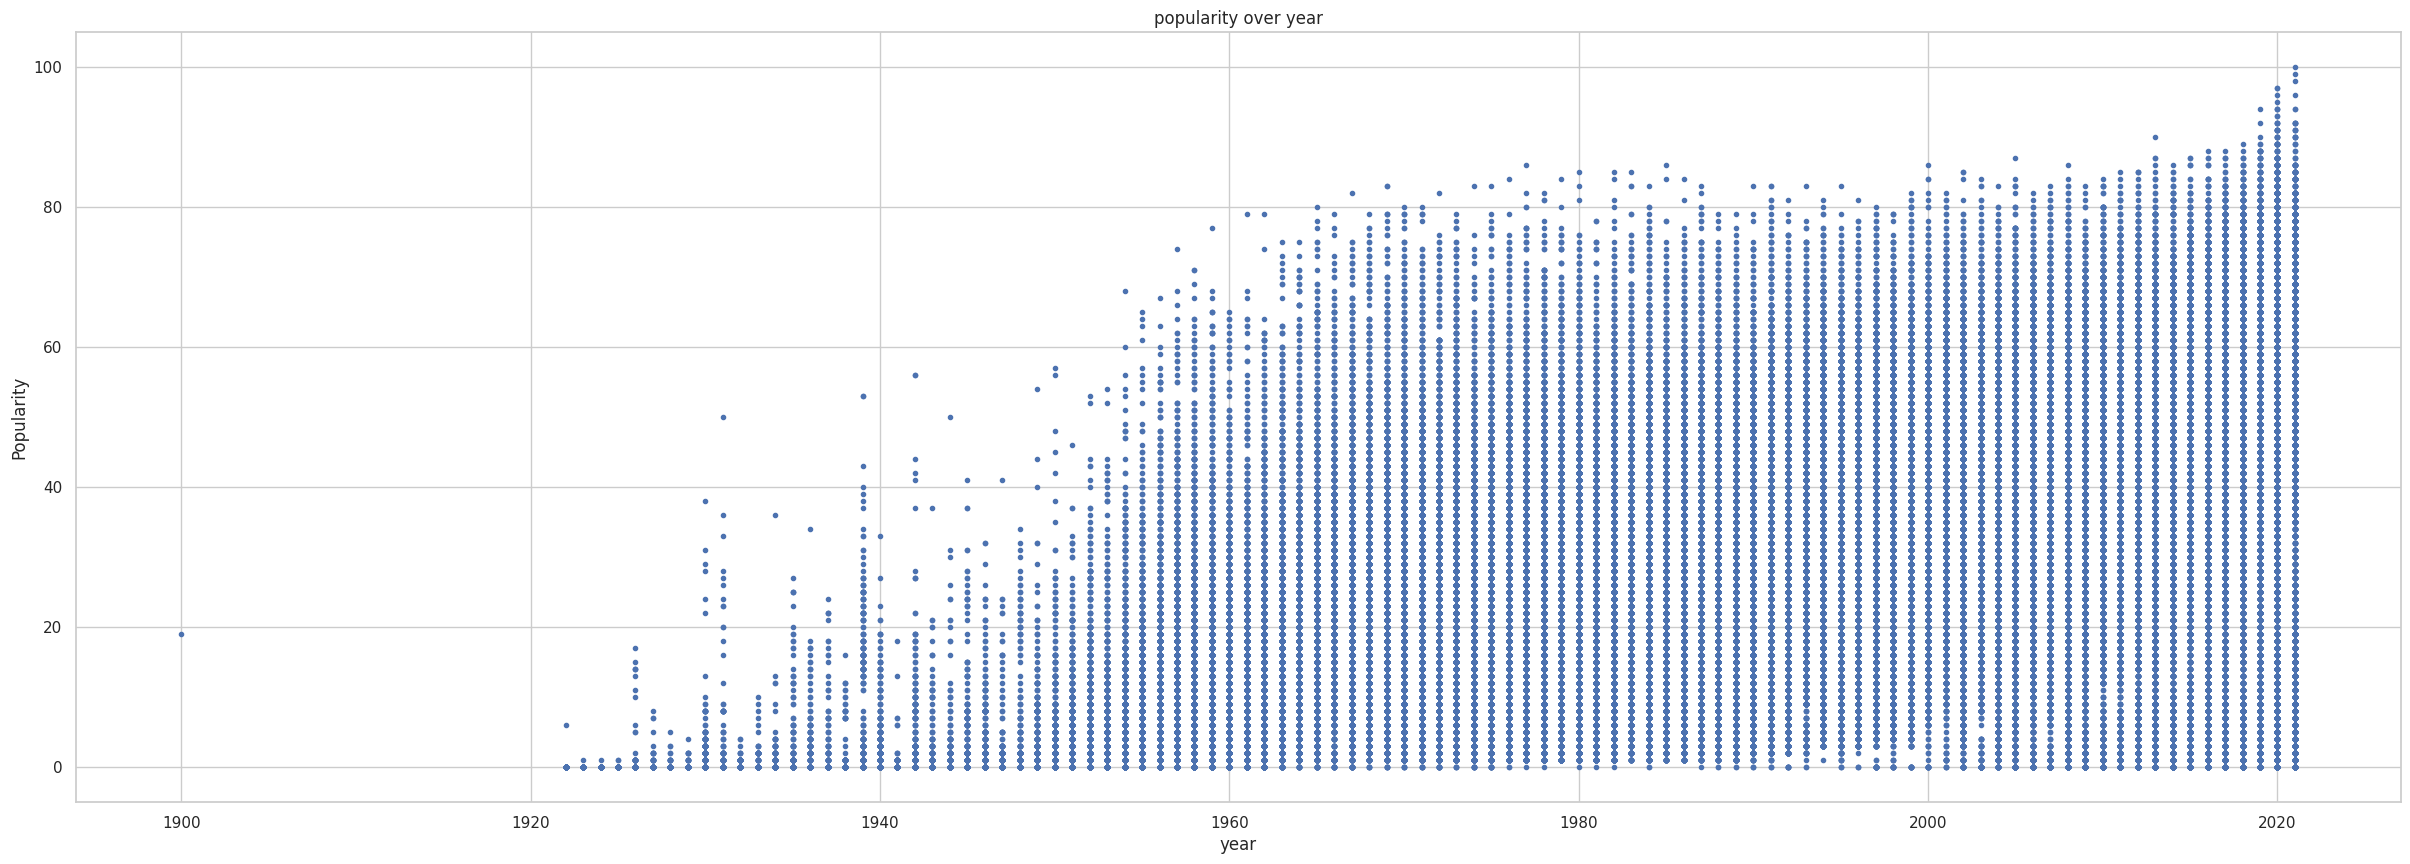

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["year"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('year')
plt.title("popularity over year")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean year for song popularity')

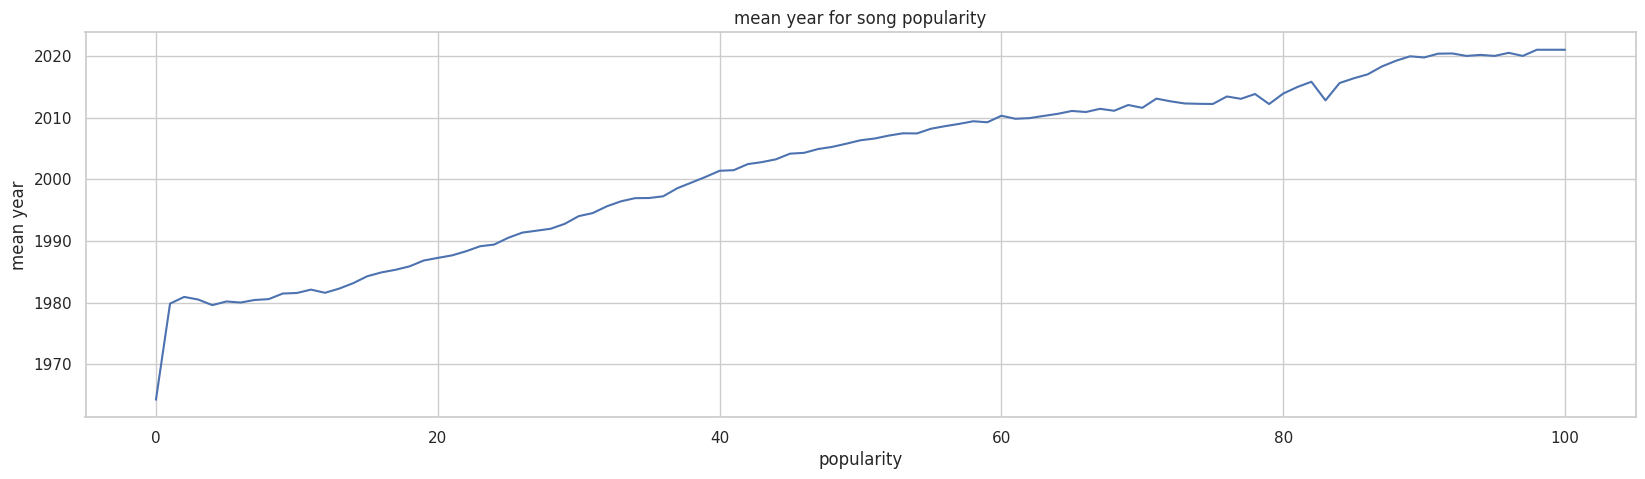

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["year"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean year')
axis.set_xlabel('popularity')
axis.set_title("mean year for song popularity")

**Newer Songs Are More Popular**:

Recently released songs are more likely to be popular. This is intuitive, as newer songs generally have a higher chance of being heard due to current trends and listener preferences. Additionally, the dataset calculates popularity based on the timing of streams, which means recent songs are more likely to have accumulated plays within the relevant timeframe.

### Relationship between energy and popularity

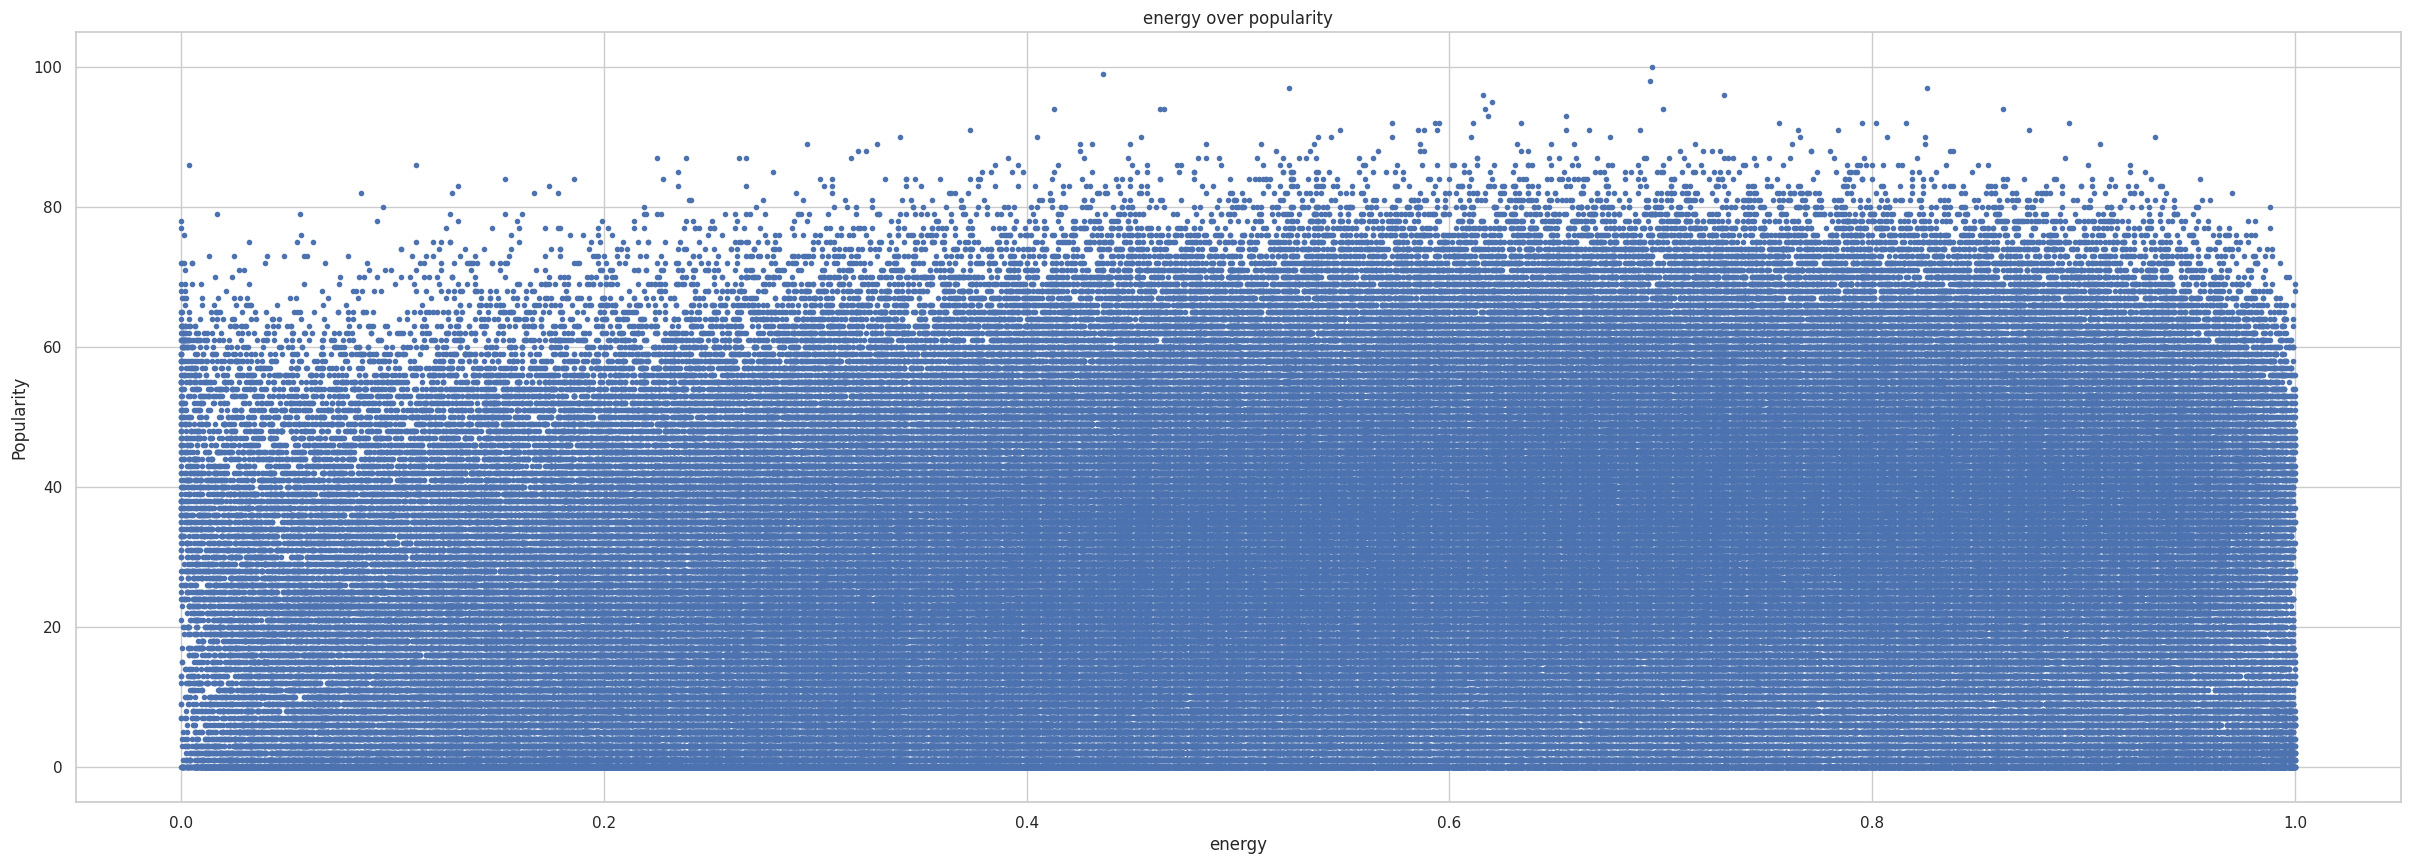

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["energy"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('energy')
plt.title("energy over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean energy for song popularity')

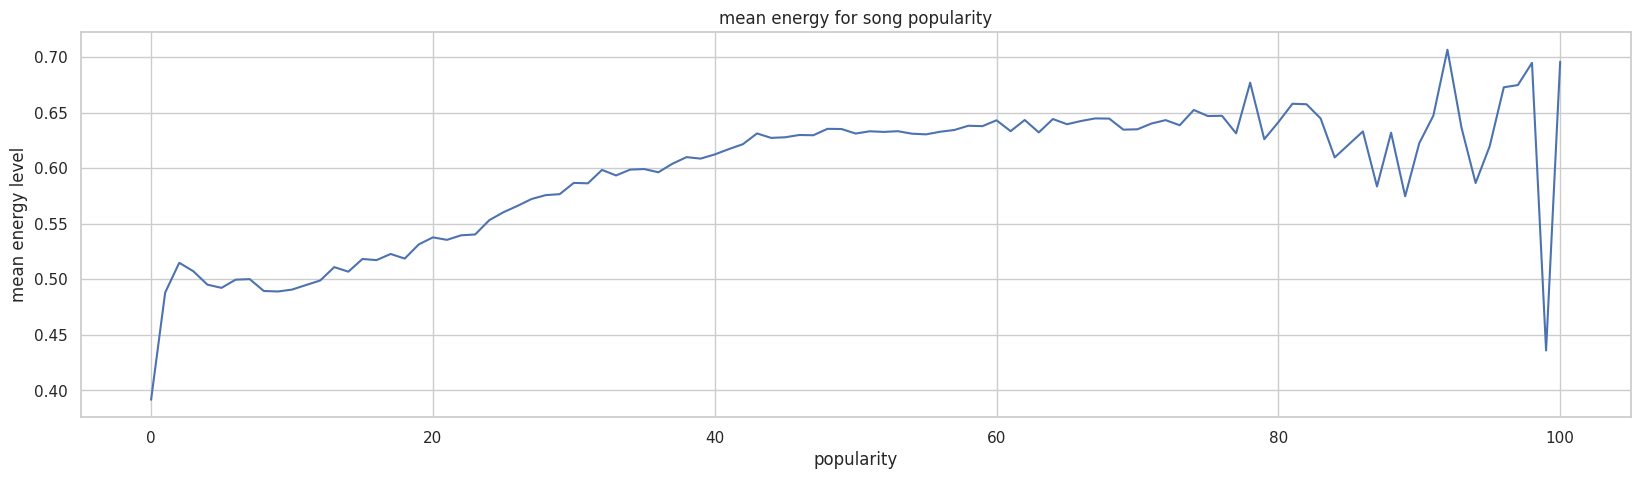

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('popularity')
axis.set_title("mean energy for song popularity")

**Energetic Songs Tend to Be More Popular**:

On average, songs with higher energy levels are more likely to be popular. While this trend may be harder to discern in a scatter plot, it becomes apparent in aggregated visualizations like line or bar plots.

### Relationship between livliness and popularity

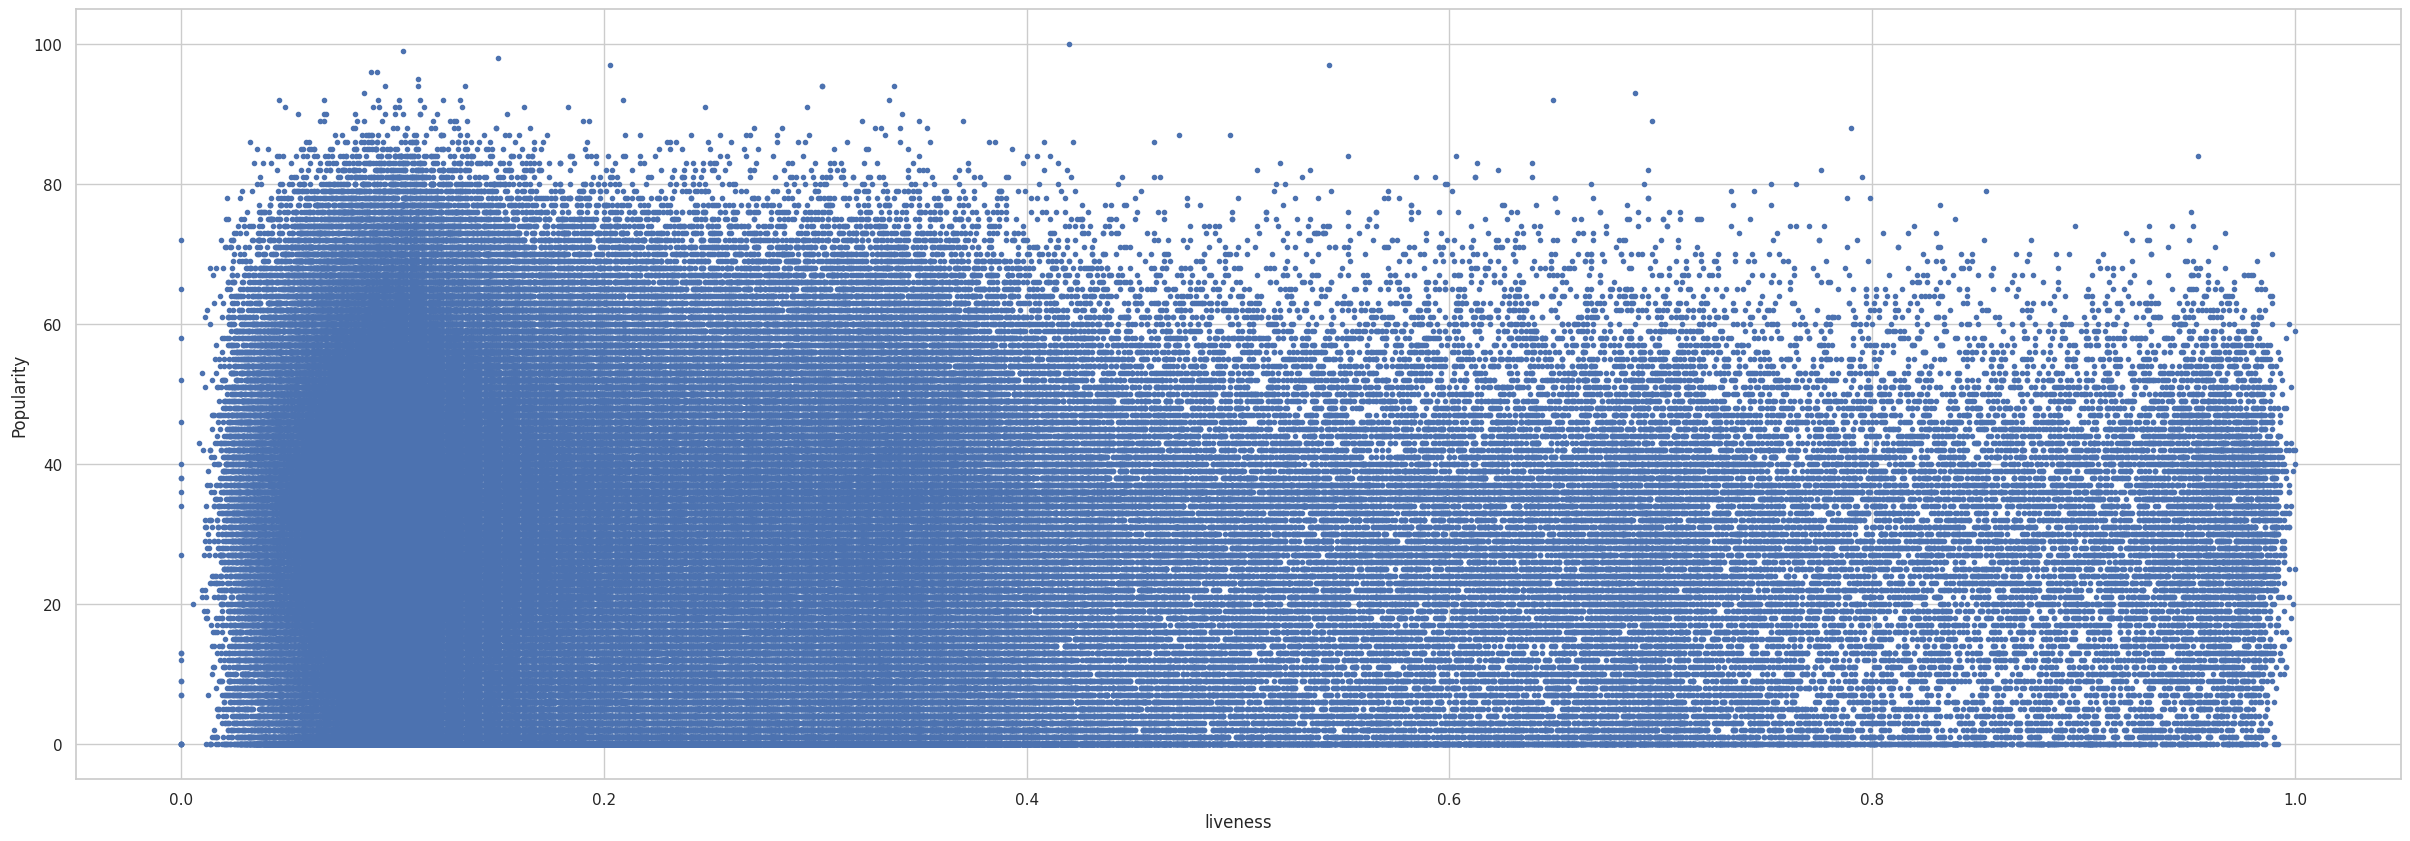

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["liveness"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

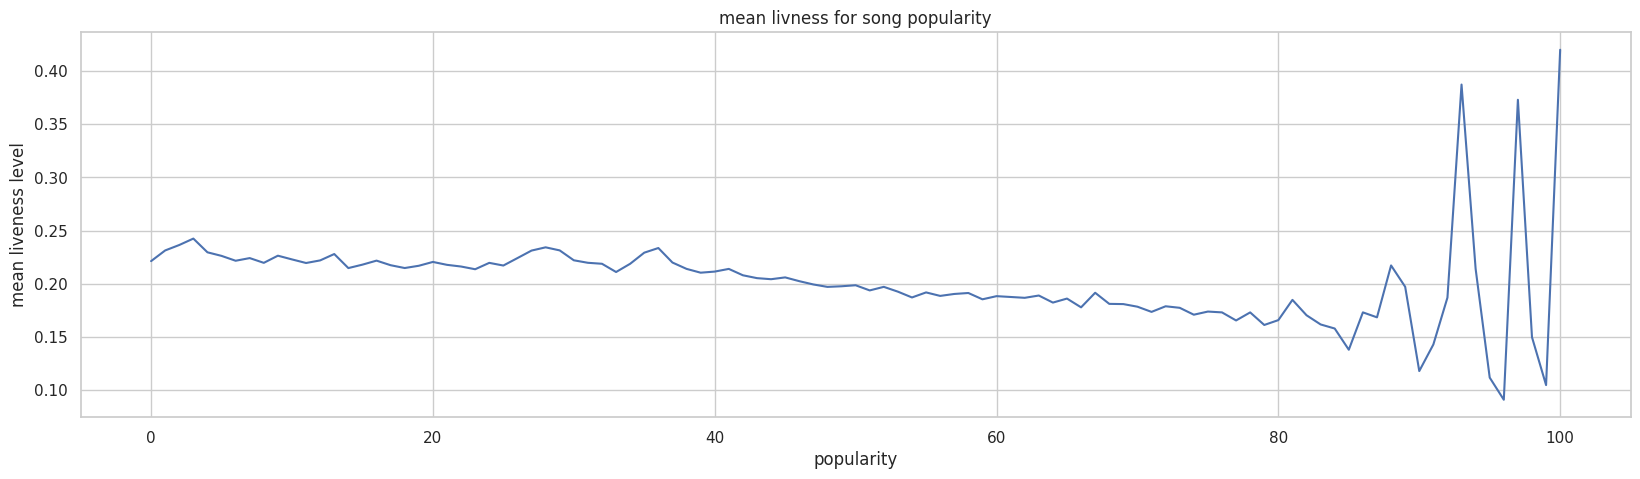

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean livness for song popularity")


**Limited Impact of Liveness on Popularity**:

Overall, liveness does not seem to significantly affect a song's popularity compared to energy. However, there is a noticeable peak in liveness when popularity reaches around 95, indicating that very popular songs may tend to have higher liveness.

### Relationship between acousticness and popularity

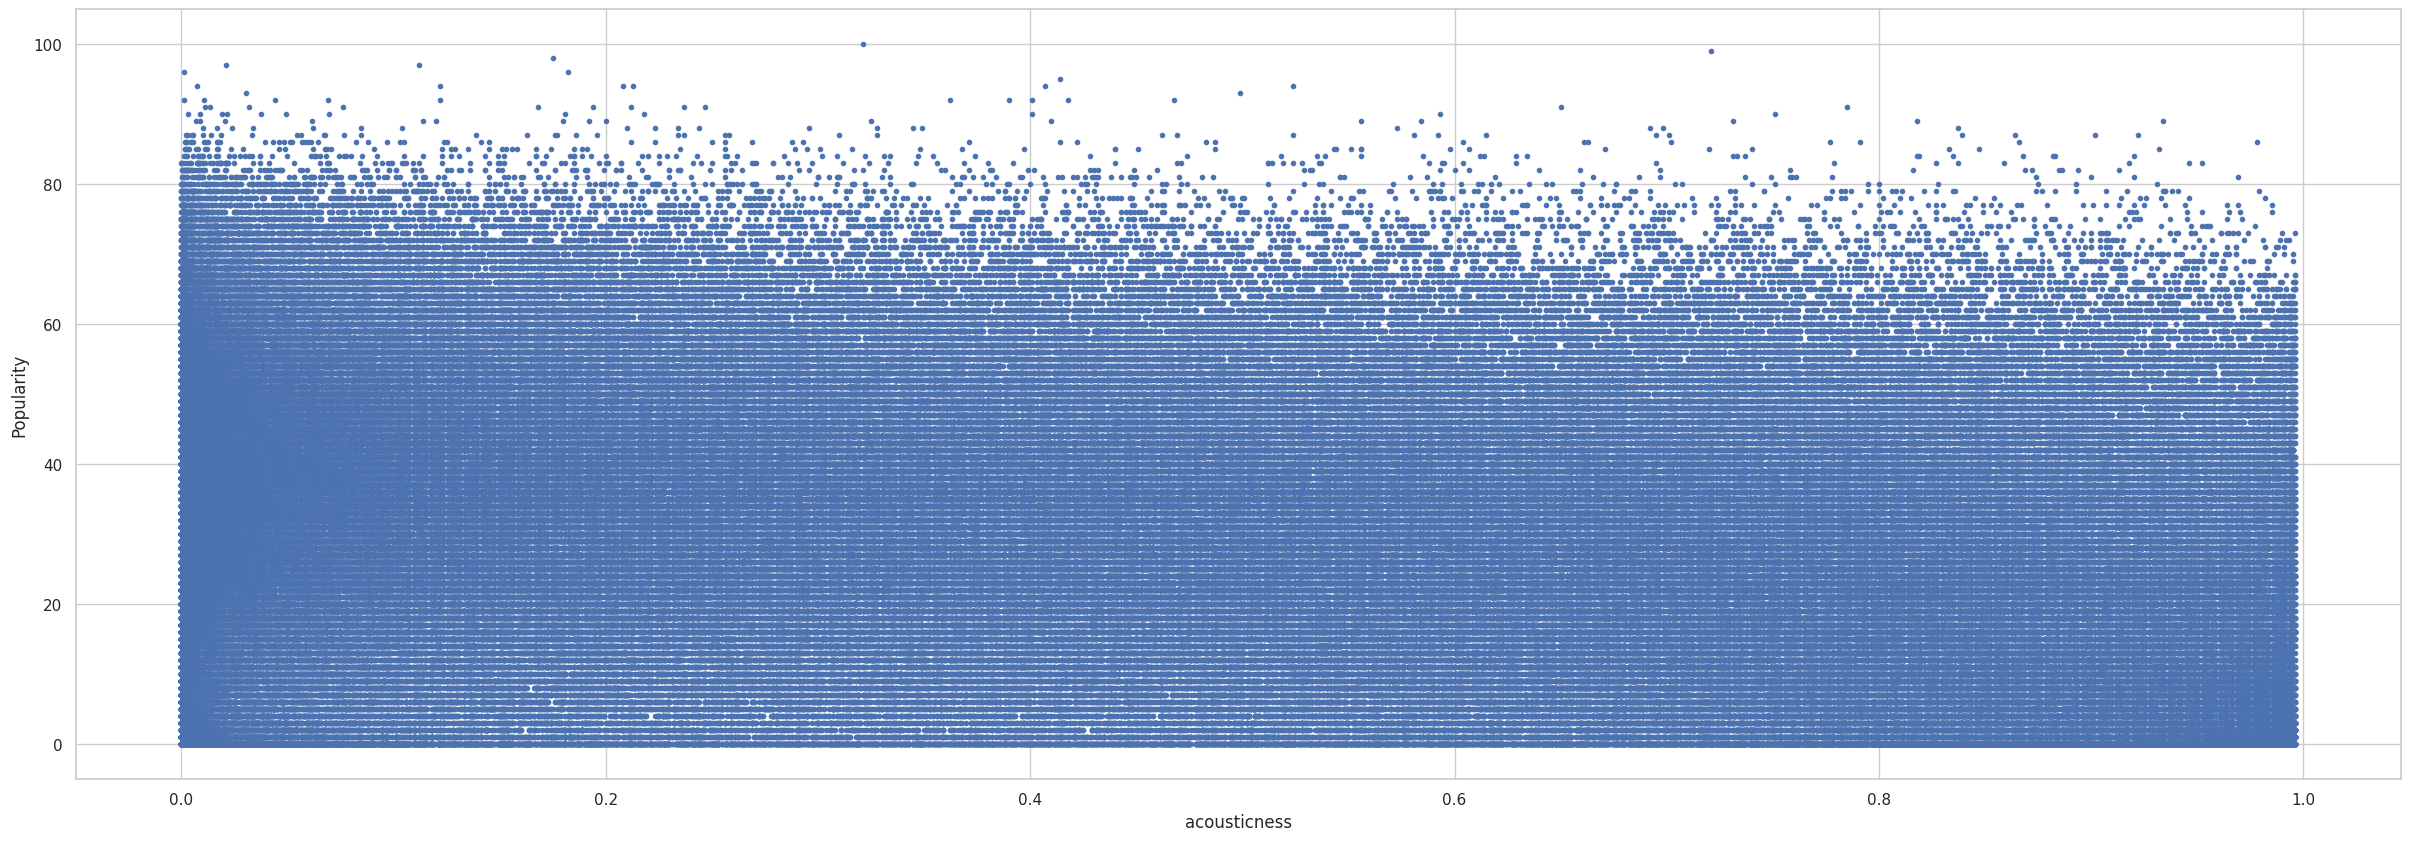

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["acousticness"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('acousticness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean acousticness for song popularity')

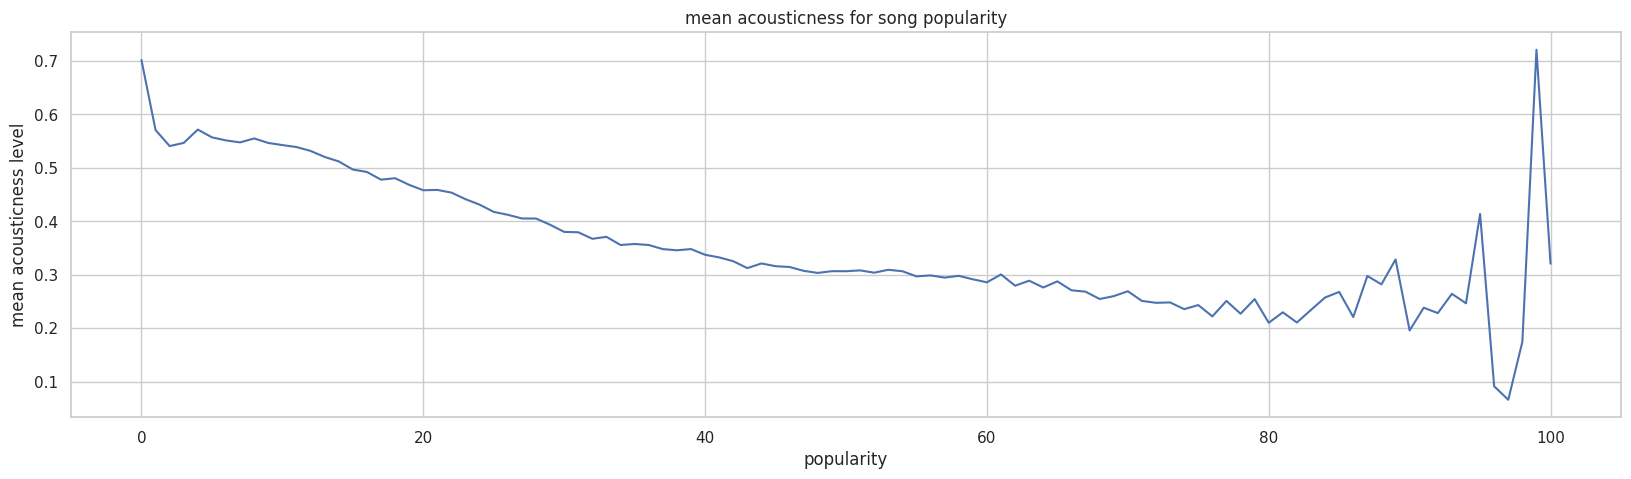

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('popularity')
axis.set_title("mean acousticness for song popularity")

**Popular Songs Have Lower Acousticness**:

More popular songs generally exhibit lower levels of acousticness. This trend aligns with the dominance of mainstream music genres like EDM and hip-hop, which rely heavily on electronic elements rather than acoustic instrumentation.

# Causal Inference

### Normalize numerical features for comparison

In [ ]:

from sklearn.preprocessing import MinMaxScaler

features_to_normalize = [
    'danceability', 'energy', 'liveness', 'tempo', 'acousticness', 'valence'
]

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features_to_normalize])
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize)

# Combine normalized features with the outcome and confounders
causal_data = pd.concat([df[['popularity', 'year', 'explicit', 'mode']], normalized_df], axis=1)

### Causal Inference for Each Treatment

In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [ ]:
file_path = "SpotifyAudioFeaturesApril2019.csv"  # Replace with your dataset's path
data = pd.read_csv(file_path)

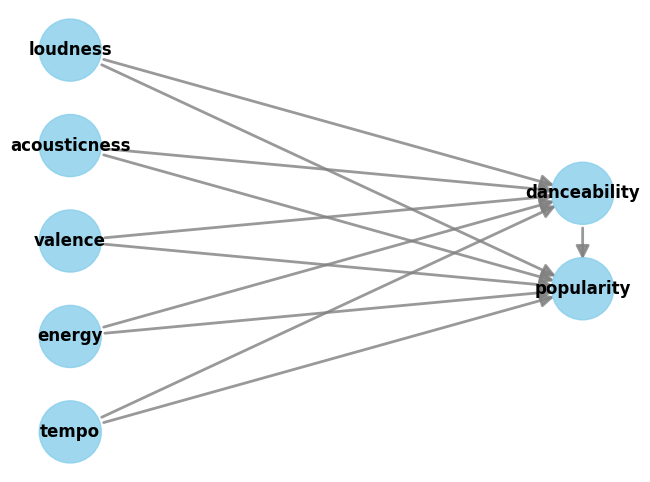

In [ ]:
from dowhy import CausalModel

# Define treatment, outcome, and confounders
treatment = 'danceability'  # Example treatment feature
outcome = 'popularity'
confounders = ['energy', 'valence', 'acousticness', 'tempo', 'loudness']

# Subset data for analysis
causal_data = data[[treatment, outcome] + confounders]

# Create the causal model
model = CausalModel(
    data=causal_data,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders
)

# View the causal graph
model.view_model()


In [ ]:
# Identify causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Identified estimand:", identified_estimand)

# Estimate causal effect using Linear Regression
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate"  # Average Treatment Effect
)
print("Causal Estimate:", causal_estimate.value)


Identified estimand: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                 
───────────────(E[popularity|tempo,energy,valence,acousticness,loudness])
d[danceability]                                                          
Estimand assumption 1, Unconfoundedness: If U→{danceability} and U→popularity then P(popularity|danceability,tempo,energy,valence,acousticness,loudness,U) = P(popularity|danceability,tempo,energy,valence,acousticness,loudness)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate: 5.982218541545166


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


### Refutation Testing

In [ ]:
# Perform placebo test
placebo_refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter"
)
print("\nPlacebo Refutation:", placebo_refutation)

# Perform data subset refutation
subset_refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="data_subset_refuter"
)
print("\nSubset Refutation:", subset_refutation)


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


Placebo Refutation: Refute: Use a Placebo Treatment
Estimated effect:5.982218541545166
New effect:1.3855583347321954e-13
p value:0.0



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


Subset Refutation: Refute: Use a subset of data
Estimated effect:5.982218541545166
New effect:5.963028619531973
p value:0.94



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


# Conclusion

Based on the results, it appears that the release year remains the primary factor influencing a song's popularity. While energy does have an effect, it's not as prominent as expected. The regression analysis shows that while energy is a contributing factor, there are clearly other elements beyond just high energy that determine a song's popularity.

Interestingly, although highly popular songs tend to have high liveness scores, liveness itself doesn’t seem to significantly affect a song's popularity. It’s likely that the correlation between high liveness and popularity is more a reflection of current trends rather than a direct cause.

Our findings suggest that popular music tends to lose its prominence over time, with popularity decreasing as the years go by. However, this trend underscores the evolving nature of music preferences and cultural shifts. Additionally, while audio features like energy play a role in a song's success, they are not the sole determinants of popularity. Other factors, such as emotional connection, lyrics, background stories, and the artist's influence, likely play a significant role in making a song truly resonate with listeners.

Ultimately, our project highlights that while musical attributes are important, the broader context and cultural connections a song makes are what truly drive its lasting popularity.